In [8]:
from Robotsensor.meshLoader import SceneLoader

In [9]:
def createScenes(dir_carpeta,img_H,img_W, floor=False):
    miEscena = SceneLoader(dir_carpeta,floor)
    render, scene = miEscena.get_scenes(img_H,img_W)
    return render, scene

In [10]:
dir_carpeta= "/mnt/6C24E28478939C77/Saulo/ProyectoPHD/objects/Curver_Storage_Bin_Black_Small"
w= 100
render, scene = createScenes(dir_carpeta,w,w)

[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x6653ca0 (threading is enabled)
EGL(1.5)
OpenGL(4.1)


In [11]:
from Reconstructor.Reconstructor import Reconstructor

In [12]:
rec = Reconstructor("/mnt/6C24E28478939C77/Saulo/ProyectoPHD/valparams.yaml")

# Partial Models

## Octree

In [1]:
from Partialmodel.partialModel import PMOctomapPy, PMPointCloudPy
from utils.voxelvis import visualize_octree_voxels
import octomap 

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
octre = PMOctomapPy(0.025)

In [3]:
file_name= "/mnt/6C24E28478939C77/Saulo/ProyectoPHD/objects/CHICKEN_NESTING/Point_cloud/NBVNET/Itera1/cloud_1.pcd"

In [7]:
octre.updateWithScan(file_name_scan= file_name,
                    file_name_origin= "/mnt/6C24E28478939C77/Saulo/ProyectoPHD/objects/CHICKEN_NESTING/Point_cloud/NBVNET/Itera1/cloud_0.pcd")

True

In [3]:
file_name= "/mnt/cc7c68c6-c81c-401d-91fd-04c40177514b/ScannedObjects/3D_Dollhouse_Refrigerator/Octree/Voxnet/Iteraxxtra2/octree_0.ot"
octre.loadPartialModel(file_name)

True

In [5]:
octree = octre.getPartialModel()

In [6]:
visualize_octree_voxels(octree)

In [6]:
octre.getUnknownVolume()

7987

## Pointcloud

In [8]:
pointcloud = PMPointCloudPy(0.005)

In [9]:
pointcloud.updateWithScan(file_name)

In [10]:
mi_nube= pointcloud.getPartialModel()

In [11]:
import open3d as o3d 
import numpy as np

In [12]:
o3d.visualization.draw_geometries([mi_nube])

# ViewPlanner
## AutoEncoder

In [4]:
from Viewplanner.AENBV import AENBV

In [5]:
autoenc = AENBV("None", octre)

In [6]:
autoenc.PlanNBV()

array([0.34781578, 0.26675767, 0.36203536])

In [8]:
#Once model has been updated
autoenc.PlanNBV()

array([0.26802415, 0.02727504, 0.65783763])

# Pruebas reconstructor

In [1]:
from Reconstructor.Reconstructor import Reconstructor

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
pruebarec = Reconstructor("dataexample/paramsAE.yaml")

La carpeta de Itera9/ ya existe, no se sobreescribe


In [3]:
pruebarec.runReconstuctor()

[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x406780d0 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...


In [2]:
pruebaNBVNet = Reconstructor("dataexample/paramsNBVNet.yaml")

In [3]:
pruebaNBVNet.runReconstuctor()

[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x19bb5910 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...


### Reconstructor simple sin condición de paro

In [5]:
from Reconstructor.Reconstructor import Reconstructor
pruebaPCNBV = Reconstructor('dataexample/paramsAEs.yaml')

In [6]:
pruebaPCNBV.runReconstuctorWoC()

Initializing reconstruction process ...
--- 0.09427452087402344 seconds ---
--- 0.021405696868896484 seconds ---


### Reconstructor multiples sin condición de paro

In [1]:
from Reconstructor.Reconstructor import Reconstructor

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
pruebaPCNBVMulti = Reconstructor('dataexample/paramsAET.yaml')
pruebaPCNBVMulti.runReconstuctorMultipleWoCnP()

La carpeta de Iteraxnoise_20/ ya existe, no se sobreescribe
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x22984bb0 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...


/mnt/6C24E28478939C77/Saulo/vpl_python/Viewplanner/AENBVwTnP.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  p = torch.tensor(p, device=device, dtype=dtype)
/mnt/6C24E28478939C77/Saulo/vpl_python/Viewplanner/AENBVwTnP.py:151: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cos_min = torch.cos(torch.tensor(self.angle_limit, device=device, dtype=dtype))


La carpeta de Iteraxnoise_20/ ya existe, no se sobreescribe
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x22982740 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
La carpeta de Iteraxnoise_20/ ya existe, no se sobreescribe
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x29432410 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
La carpeta de Iteraxnoise_20/ ya existe, no se sobreescribe
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x2959f020 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
La carpeta de Iteraxnoise_20/ ya existe, no se sobreescribe
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x29432410 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
La carpeta de Iteraxnoise_20/ ya existe, no se sobreescribe
[Open3D INFO] EGL headless mode enabled.

In [2]:
pruebaPCNBVMulti = Reconstructor('dataexample/paramsAET.yaml')
pruebaPCNBVMulti.runReconstuctorMultipleWoC()

[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x2da17790 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x2da177c0 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x36e11800 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x36e0d580 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x36e0d580 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x2da177c0 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
[Open3D IN

In [1]:
from Reconstructor.Reconstructor import Reconstructor
pruebaPCNBVMulti = Reconstructor('dataexample/paramsPCNBVxxtra2.yaml')
pruebaPCNBVMulti.runReconstuctorMultipleWoCnOnlyPC()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
La carpeta de Iteraxxtra2/ ya existe, no se sobreescribe
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x391b7740 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
La carpeta de Iteraxxtra2/ ya existe, no se sobreescribe
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x7f9ae86a9010 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
La carpeta de Iteraxxtra2/ ya existe, no se sobreescribe
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x7f9ae86a9010 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
La carpeta de Iteraxxtra2/ ya existe, no se sobreescribe
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x7f9ae86a9010 (threading is e

In [ ]:
import os
os.listdir("/mnt/cc7c68c6-c81c-401d-91fd-04c40177514b/ScannedObjects")
pruebaPCNBVMulti = Reconstructor('dataexample/paramsPCNBVxxtra2.yaml')


['PETS_ACCESSORIES',
 'Timberland_Mens_Earthkeepers_Stormbuck_Chukka',
 'Olive_Kids_Birdie_Munch_n_Lunch',
 'Womens_Bluefish_2Eye_Boat_Shoe_in_Linen_Natural_Sparkle_Suede_w34KNQ41csH',
 'Nestle_Pure_Life_Exotics_Sparkling_Water_Strawberry_Dragon_Fruit_8_count_12_fl_oz_can',
 'Mad_Gab_Refresh_Card_Game',
 'Cole_Hardware_Flower_Pot_1025',
 'UGG_Bailey_Button_Triplet_Womens_Boots_Black_7',
 'Mens_Authentic_Original_Boat_Shoe_in_Navy_Leather_xgoEcZtRNmH',
 'PEPSI_NEXT_CACRV',
 'Ecoforms_Plant_Container_QP6HARVEST',
 'Office_Depot_Canon_CL_41_Remanufactured_Ink_Cartridge_TriColor',
 'Room_Essentials_Kitchen_Towels_16_x_26_2_count',
 'BREAKFAST_MENU',
 'Hefty_Waste_Basket_Decorative_Bronze_85_liter',
 'Vtech_Cruise_Learn_Car_25_Years',
 'Winning_Moves_1180_Aggravation_Board_Game',
 'Calphalon_Kitchen_Essentials_12_Cast_Iron_Fry_Pan_Black',
 'Room_Essentials_Fabric_Cube_Lavender',
 'Reebok_SH_PRIME_COURT_MID',
 'Cole_Hardware_Deep_Bowl_Good_Earth_1075',
 'Whey_Protein_Vanilla_12_Packets',
 'W

In [1]:
## Random view reconstruction
from Reconstructor.Reconstructor import Reconstructor
pruebaPCNBVMulti = Reconstructor('dataexample/paramsRandom.yaml')
pruebaPCNBVMulti.runReconstuctorMultipleWoC()

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x1509e810 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x1509e480 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x1509e480 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x161211c0 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
[Open3D INFO] EGL headless mode enabled.
FEngine (64 bits) created at 0x1509e480 (threading is enabled)
EGL(1.5)
OpenGL(4.1)
Initializing reconstruction process ...
[Open3

# OBject decompress

In [9]:
import os,zipfile
def extract_zip(folder, model_name):
    try:
        file_name = os.path.abspath(folder + model_name ) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        os.mkdir(file_name[:-4])
        zip_ref.extractall(file_name[:-4]) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # del file
    except:
        print("No zip file")

In [4]:
import pandas as pd, os

def symbolic(direcciones):

    for i in range(0,len(direcciones)):
        d = direcciones.iat[i,0]
        file_src = d + '/materials/textures/texture.png' #source file
        file_dst = d + '/meshes/texture.png' #destiny file
        os.symlink(file_src,file_dst) #create link

def symbolic_dir(direccion):
    d = direccion
    file_src = d + '/materials/textures/texture.png' #source file
    file_dst = d + '/meshes/texture.png' #destiny file
    os.symlink(file_src,file_dst) #create link

In [11]:
dir = "/mnt/6C24E28478939C77/Saulo/vpl_python/dataexample/objects/"
list= os.listdir(dir)

In [10]:
for i in list:
    extract_zip(dir,i)

No zip file


In [14]:
for i in list:
    try:
        symbolic_dir(dir+i)
    except:
        print("NO funciono")

NO funciono
NO funciono
NO funciono


In [9]:
import os
direccionobj = "/mnt/6C24E28478939C77/Saulo/vpl_python/dataexample/objects/My_Little_Pony_Princess_Celestia/"
carpeta_metodo = "PCNBV"
carpeta_iter = "Itera2"
if os.path.lexists(direccionobj+"Point_cloud/") == False:
    os.mkdir(direccionobj +"Point_cloud/" )
    os.mkdir(direccionobj +"Octree/")
    os.mkdir(direccionobj + "RGB/" )
    os.mkdir(direccionobj + "Depth/")
if os.path.lexists(direccionobj+"Point_cloud/"+ carpeta_metodo) == False:
    os.mkdir(direccionobj +"Point_cloud/" + carpeta_metodo)
    os.mkdir(direccionobj +"Octree/"+ carpeta_metodo)
    os.mkdir(direccionobj + "RGB/" + carpeta_metodo)
    os.mkdir(direccionobj + "Depth/" + carpeta_metodo)
if os.path.lexists(direccionobj+"Point_cloud/"+ carpeta_metodo) == True:
    os.mkdir(direccionobj +"Point_cloud/" + carpeta_metodo + "/"+carpeta_iter)
    os.mkdir(direccionobj +"Octree/"+ carpeta_metodo+ "/"+carpeta_iter)
    os.mkdir(direccionobj + "RGB/" + carpeta_metodo+ "/"+carpeta_iter)
    os.mkdir(direccionobj + "Depth/" + carpeta_metodo+ "/"+carpeta_iter)


#  Ploteo de las perspectivas PCNBV

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

In [6]:
path_input_pose = "stuff/pcnbv/viewspace_shapenet_33.txt"
dataset_pose = np.loadtxt(path_input_pose)
print("Poses data size: \n",dataset_pose.shape)
print("Pose data: \n", dataset_pose[2])

Poses data size: 
 (33, 3)
Pose data: 
 [0.35355339 0.8660254  0.35355339]


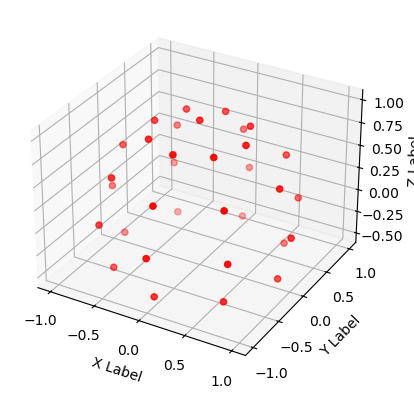

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataset_pose[:,0], dataset_pose[:,2], dataset_pose[:,1], color='red')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

#ax.set_zlim(0,1)

plt.show()

In [8]:
print(np.max(dataset_pose[:,0]),np.min(dataset_pose[:,0]))
print(np.max(dataset_pose[:,1]),np.min(dataset_pose[:,1]))
print(np.max(dataset_pose[:,2]),np.min(dataset_pose[:,2]))

1.0 -1.0
1.0 -0.49999999999999994
1.0 -1.0


In [29]:
valor_normalizado_x = -0.4 + 0.8 * (dataset_pose[:,0] - np.min(dataset_pose[:,0])) / (np.max(dataset_pose[:,0]) - np.min(dataset_pose[:,0]))
valor_normalizado_z = 0 + 0.4 * (dataset_pose[:,1] - np.min(dataset_pose[:,1])) / (np.max(dataset_pose[:,1]) - np.min(dataset_pose[:,1]))
valor_normalizado_y = -0.4 + 0.8 * (dataset_pose[:,2] - np.min(dataset_pose[:,2])) / (np.max(dataset_pose[:,2]) - np.min(dataset_pose[:,2]))

In [36]:
normal = np.concatenate((valor_normalizado_x.reshape((33,1)),valor_normalizado_y.reshape((33,1)),valor_normalizado_z.reshape((33,1))), axis=1)

In [38]:
normal.shape

(33, 3)

In [39]:
np.savetxt("stuff/pcnbv/viewspace_shapenet_33_normal.txt",normal)

In [ ]:
a = dataset_pose[:,2]
np.where(a>=0.0)[0]

array([[ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 1.41421356e-01],
       [ 2.00000000e-01],
       [ 1.41421356e-01],
       [ 0.00000000e+00],
       [-1.41421356e-01],
       [-2.00000000e-01],
       [-1.41421356e-01],
       [ 0.00000000e+00],
       [ 2.44948974e-01],
       [ 3.46410162e-01],
       [ 2.44948974e-01],
       [ 0.00000000e+00],
       [-2.44948974e-01],
       [-3.46410162e-01],
       [-2.44948974e-01],
       [ 0.00000000e+00],
       [ 2.82842712e-01],
       [ 4.00000000e-01],
       [ 2.82842712e-01],
       [ 1.11022302e-16],
       [-2.82842712e-01],
       [-4.00000000e-01],
       [-2.82842712e-01],
       [ 0.00000000e+00],
       [ 2.44948974e-01],
       [ 3.46410162e-01],
       [ 2.44948974e-01],
       [ 0.00000000e+00],
       [-2.44948974e-01],
       [-3.46410162e-01],
       [-2.44948974e-01]])

In [26]:
x =np.extract(a>=0, dataset_pose[:,0])
y =np.extract(a>=0, dataset_pose[:,1])
z =np.extract(a>=0, dataset_pose[:,2])

Text(0.5, 0, 'Z Label')

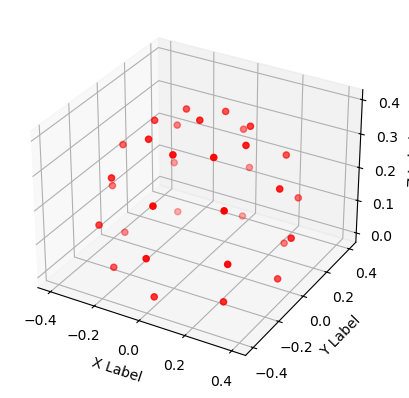

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(valor_normalizado_x, valor_normalizado_y, valor_normalizado_z, color='red')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [ ]:
import numpy as np
import os
import sys
import time
import pdb

# Usage: blender -b -P render_depth.py [ShapeNet directory] [model list] [output directory] [num scans per model]


def random_pose():
    angle_x = np.random.uniform() * 2 * np.pi
    angle_y = np.random.uniform() * 2 * np.pi
    angle_z = np.random.uniform() * 2 * np.pi
    Rx = np.array([[1, 0, 0],
                    [0, np.cos(angle_x), -np.sin(angle_x)],
                    [0, np.sin(angle_x), np.cos(angle_x)]])
    Ry = np.array([[np.cos(angle_y), 0, np.sin(angle_y)],
                    [0, 1, 0],
                    [-np.sin(angle_y), 0, np.cos(angle_y)]])
    Rz = np.array([[np.cos(angle_z), -np.sin(angle_z), 0],
                    [np.sin(angle_z), np.cos(angle_z), 0],
                    [0, 0, 1]])
    R = np.dot(Rz, np.dot(Ry, Rx))
    # Set camera pointing to the origin and 1 unit away from the origin
    t = np.expand_dims(R[:, 2], 1)
    pose = np.concatenate([np.concatenate([R, t], 1), [[0, 0, 0, 1]]], 0)
    return t, pose

def cal_pose(angle_x, angle_y, angle_z):
    Rx = np.array([[1, 0, 0],
                    [0, np.cos(angle_x), -np.sin(angle_x)],
                    [0, np.sin(angle_x), np.cos(angle_x)]])
    Ry = np.array([[np.cos(angle_y), 0, np.sin(angle_y)],
                    [0, 1, 0],
                    [-np.sin(angle_y), 0, np.cos(angle_y)]])
    Rz = np.array([[np.cos(angle_z), -np.sin(angle_z), 0],
                    [np.sin(angle_z), np.cos(angle_z), 0],
                    [0, 0, 1]])
    R = np.dot(Rz, np.dot(Ry, Rx))

    # Set camera pointing to the origin(0, 1, 0) and 1 unit away from the origin
    t = np.expand_dims(R[:, 2], 1) * 1
    pose = np.concatenate([np.concatenate([R, t], 1), [[0, 0, 0, 1]]], 0)
    return t, pose

if __name__ == '__main__': 
    
    t_list = []

    for i in range(-90, 45, 30):
        angle_x = i * np.pi / 180
        for j in range(0, 360, 45):
            angle_y = j * np.pi / 180
            t, _ = cal_pose(angle_x, angle_y, 0)
            t_list.append(t)

    viewspace = np.hstack(t_list).T

In [32]:
viewspace.shape

(40, 3)

In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

ModuleNotFoundError: No module named 'colmap'

In [4]:
import open3d as o3d
import numpy as np

In [7]:
direccion = "/mnt/6C24E28478939C77/Saulo/ProyectoPHD/objects/CHICKEN_NESTING"
mesh = o3d.io.read_triangle_mesh(direccion + '/meshes/model.obj', True)
number_of_points = 16384 # according to PC-NBV

In [6]:
mesh.vertices

std::vector<Eigen::Vector3d> with 5993 elements.
Use numpy.asarray() to access data.

In [10]:
size = np.asarray(mesh.vertices).shape[0]
mesh.compute_vertex_normals()
p_gt = mesh.sample_points_uniformly(number_of_points= number_of_points)

In [46]:
p_gt.points

std::vector<Eigen::Vector3d> with 16384 elements.
Use numpy.asarray() to access data.

## Raycasting scene implementations

In [54]:
import open3d as o3d
import numpy as np
from utils.utils_o3d import scale_and_translate

class SimplePointCloudRaycast:
    def __init__(self, pcd_direction, width=640, height=480, fov=45, search_radius=0.01,needmesh=True):
        
        if needmesh == True: # we expect mesh direction
            self.__pc_from_mesh(pcd_direction)
        else: # we expect poincloud direction
            self.pcd = o3d.io.read_point_cloud(pcd_direction)
        
        self.kdtree = o3d.geometry.KDTreeFlann(self.pcd)
        self.search_radius = search_radius
        self.points = np.asarray(self.pcd.points)
        self.width = width
        self.height = height
        self.fov = fov

    def __pc_from_mesh(self,direction):
        mesh = o3d.io.read_triangle_mesh(direction + '/meshes/model.obj', True)
        mesh = scale_and_translate(mesh)
        number_of_points = 16384 # according to PC-NBV
        mesh.compute_vertex_normals()
        self.pcd = mesh.sample_points_uniformly(number_of_points= number_of_points)

    def get_visible_points(self, center, eye, step_factor=1):
        """
        Obtiene solo los puntos visibles usando raycast
        
        Args:
            center: np.array([x, y, z]) - punto hacia donde mira la cámara
            eye: np.array([x, y, z]) - posición de la cámara
            width: ancho de la "imagen virtual" para densidad de rayos
            height: alto de la "imagen virtual" para densidad de rayos
            fov: campo de visión en grados
            step_factor: factor para reducir rayos (1=todos, 2=cada 2 píxeles, etc.)
            
        Returns:
            dict: información de puntos visibles
        """
        
        # Calcular vectores de la cámara
        forward = center - eye
        forward = forward / np.linalg.norm(forward)
        
        # Vector up (asumimos Y hacia arriba)
        world_up = np.array([0, 1, 0])
        right = np.cross(forward, world_up)
        right = right / np.linalg.norm(right)
        
        up = np.cross(right, forward)
        up = up / np.linalg.norm(up)
        
        # Parámetros de la cámara
        aspect_ratio = self.width / self.height
        fov_rad = np.radians(self.fov)
        tan_half_fov = np.tan(fov_rad / 2)
        
        # Estructura para almacenar puntos visibles (sin colores)
        visible_points = {
            'indices': [],           # Índices de los puntos visibles
            'coordinates': [],       # Coordenadas 3D de los puntos
            'distances': [],         # Distancias desde la cámara
            'ray_directions': [],    # Direcciones de los rayos que los encontraron
        }
        
        rays_cast = 0
        hits_found = 0
        
        # Para cada píxel (con step_factor para optimización)
        for y in range(0, self.height, step_factor):
           
            for x in range(0, self.width, step_factor):
                rays_cast += 1
                
                # Convertir coordenadas de píxel a coordenadas normalizadas [-1, 1]
                ndc_x = (2 * x / self.width) - 1
                ndc_y = 1 - (2 * y / self.height)  # Invertir Y
                
                # Calcular dirección del rayo
                ray_dir = (ndc_x * aspect_ratio * tan_half_fov * right + 
                          ndc_y * tan_half_fov * up + 
                          forward)
                ray_dir = ray_dir / np.linalg.norm(ray_dir)
                
                # Hacer raycast
                hit_result = self._intersect_ray(eye, ray_dir)
                
                if hit_result['hit']:
                    hits_found += 1
                    point_idx = hit_result['point_idx']
                    
                    # Evitar duplicados (un punto puede ser visible desde múltiples rayos)
                    if point_idx not in visible_points['indices']:
                        visible_points['indices'].append(point_idx)
                        visible_points['coordinates'].append(self.points[point_idx])
                        visible_points['distances'].append(hit_result['distance'])
                        visible_points['ray_directions'].append(ray_dir.copy())
        
        visible_points['indices'] = np.array(visible_points['indices'])
        visible_points['coordinates'] = np.array(visible_points['coordinates'])
        visible_points['distances'] = np.array(visible_points['distances'])
        visible_points['ray_directions'] = np.array(visible_points['ray_directions'])
        
        return visible_points
    
    
    def _intersect_ray(self, origin, direction, max_distance=20.0):
        """Encuentra intersección de rayo con nube de puntos"""
        step_size = self.search_radius / 3
        num_steps = int(max_distance / step_size)
        
        for i in range(num_steps):
            sample_point = origin + i * step_size * direction
            
            # Buscar puntos cercanos
            [k, idx, distances] = self.kdtree.search_radius_vector_3d(
                sample_point, self.search_radius)
            
            if k > 0:
                # Encontró intersección
                closest_idx = idx[np.argmin(distances)]
                return {
                    'hit': True,
                    'distance': i * step_size,
                    'point_idx': closest_idx,
                    'point': self.points[closest_idx],
                    'hit_point': sample_point
                }
        
        return {'hit': False, 'distance': np.inf}
    
    def create_visible_pointcloud(self, center, eye, **kwargs):
        """
        Crea una nueva nube de puntos con solo los puntos visibles (sin colores)
        """
        
        visible_points = self.get_visible_points(center, eye, **kwargs)
        visible_pcd = o3d.geometry.PointCloud()
        
        if len(visible_points['coordinates']) > 0:
            visible_pcd.points = o3d.utility.Vector3dVector(visible_points['coordinates'])

        return visible_pcd

# Ejemplo de uso
if __name__ == "__main__":
    # Crear nube de puntos de ejemplo sin colores
    #pcd = o3d.io.read_point_cloud(direccion) + "/Point_cloud/NBVNET/Itera1/cloud_gt.pcd")
    
    renderer = SimplePointCloudRaycast(direccion, width=200, height=150, search_radius=0.1)
    # Definir posición de cámara
    eye = np.array([0.6, 0.6, .2])      # Posición de la cámara
    center = np.array([0, 0, .2])   # Punto hacia donde mira

    
    # Método 1: Raycast regular (más preciso)
    print("=== Método Regular ===")
    visible_points = renderer.create_visible_pointcloud(center, eye, step_factor=2)
    
    #print(f"\nPuntos originales: {len(pcd.points)}")
    print(f"Puntos visibles (regular): {len(visible_points.points)}")
    

=== Método Regular ===
Puntos visibles (regular): 1372


In [53]:
o3d.visualization.draw_geometries([visible_points])

In [69]:
def only_raycast(x,y,**kwargs):
    only_raycasti = kwargs["raycast"]
    if only_raycasti == True:
        scene = kwargs["scene"]
    else:
        render = kwargs["render"]
        scene = kwargs["scene"]

In [73]:
only_raycast(x= 5,y= 1, raycast=True, scene=55)

## Pointcloud vis


In [2]:
import open3d as o3d
pc = o3d.io.read_point_cloud("/mnt/cc7c68c6-c81c-401d-91fd-04c40177514b/ScannedObjects/PETS_ACCESSORIES/Point_cloud/PCNBV/Iteraxxtra2/cloud_gt.pcd")
print(pc)

PointCloud with 16384 points.


In [ ]:
o3d.visualization.draw_geometries([pc])

In [3]:
import torch

In [4]:
torch.cuda.is_available()

True

In [8]:
import torch

In [ ]:
x = torch.zeros(1, 3, dtype=torch.float64)
#Agregamos una varianza 0.12 para acotar entre aprox .4 y -.4
x = x + (0.12**0.5)*torch.randn(1, 3) 

In [44]:
x

tensor([[ 0.4411,  0.0897, -0.2467]], dtype=torch.float64)